In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np

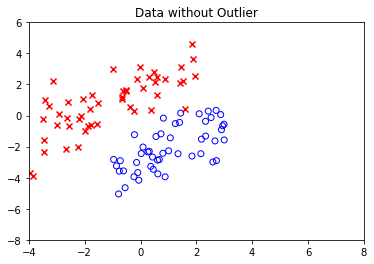

In [10]:
# 1a
red_line = np.array([2, 1])
blue_line = np.array([-3, 1])
red_xlin = 6.0 * np.random.random(50) - 4
blue_xlin = 4.0 * np.random.random(50) - 1
red_ylin = (red_line[1]*red_xlin) + np.random.randn(50) + red_line[0]
blue_ylin = (blue_line[1]*blue_xlin) + np.random.randn(50) + blue_line[0]

plt.scatter(red_xlin, red_ylin, c='r', marker='x')
plt.scatter(blue_xlin, blue_ylin, facecolors='none', edgecolors='b')
plt.axis([-4, 8, -8, 6])

plt.title('Data without Outlier')
plt.show()

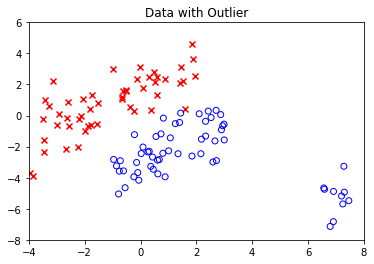

In [11]:
plt.scatter(red_xlin, red_ylin, c='r', marker='x')
plt.scatter(blue_xlin, blue_ylin, facecolors='none', edgecolors='b')
blue_outlier_line = np.array([-12.5, 1])
blue_outlier_xlin =  6.5+ np.random.random(10)
blue_outlier_ylin = (blue_outlier_line[1]*blue_outlier_xlin) + np.random.randn(10) + blue_outlier_line[0]
plt.scatter(blue_outlier_xlin, blue_outlier_ylin, facecolors='none', edgecolors='b')
plt.axis([-4, 8, -8, 6])
plt.title('Data with Outlier')
plt.show()

In [12]:
#1 bc
x1,y1,x2,y2 = [],[],[],[]

for i in range(50):
    x1.append([blue_xlin[i]])
    y1.append([blue_ylin[i]])
    x2.append([red_xlin[i]])
    y2.append([red_ylin[i]])

blue = np.hstack((x1, y1, np.zeros_like(x1)))
red = np.hstack((x2, y2, np.ones_like(x2)))
data_without_outlier = np.vstack((blue, red))


outlier_x = []
outlier_y = []
for i in range(10):
    outlier_x.append([blue_outlier_xlin[i]])
    outlier_y.append([blue_outlier_ylin[i]])
blue_outlier = np.hstack((outlier_x, outlier_y, np.zeros_like(outlier_x))) 
data_with_outlier = np.vstack((data_without_outlier, blue_outlier))

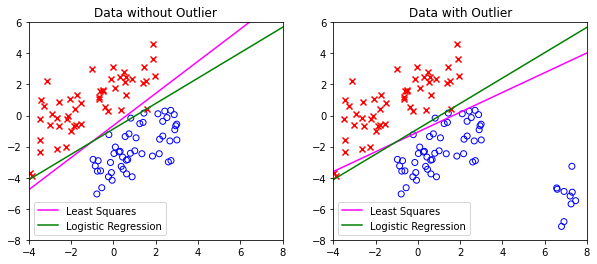

In [14]:
# Least Squares without outlier
plt.figure(figsize = (10, 4))
plt.subplot('121')
X = data_without_outlier[:, :2]
labels = data_without_outlier[:, 2]
LS_X = np.hstack([X, np.ones((X.shape[0], 1))])
LS_coef = np.linalg.pinv(LS_X) @ labels
a, b, c = LS_coef[0], LS_coef[1], LS_coef[2]


xlim = (-4,8)
ylim = (-8,6)
x = np.linspace(*xlim, 100)
y_boundary = 0.5
y = (y_boundary - a * x - c) / b

for i in range(len(data_without_outlier[:, 2])):
    if data_without_outlier[:, 2][i] == float(0):
        plt.scatter(data_without_outlier[:, 0][i], data_without_outlier[:, 1][i], facecolors='none', edgecolors='b')
    else:
        plt.scatter(data_without_outlier[:, 0][i], data_without_outlier[:, 1][i], c='r', marker='x')

plt.xlim(*xlim)
plt.ylim(*ylim)
plt.title('Data without Outlier')
plt.plot(x, y, '-', c='magenta', label='Least Squares')
plt.legend()


# Logistic Regression without outlier
LR_X = np.hstack([X, np.ones((X.shape[0], 1))])
LR_coef = np.zeros(LR_X.shape[1])
for i in range(1000):
    prev = np.copy(LR_coef)
    y_hat = 1.0 / (1.0 + np.exp(-(LR_X @ LR_coef)))
    grad = LR_X.T @ (y_hat - labels)
    h = (LR_X.T * y_hat * (1 - y_hat)) @ LR_X
    try:
        LR_coef -= np.linalg.pinv(h) @ grad
    except np.linalg.LinAlgError:
        break
    if np.allclose(LR_coef, prev):
        break

a, b, c = LR_coef[0], LR_coef[1], LR_coef[2]
y_boundary = 0
y = (y_boundary - a * x - c) / b

plt.plot(x, y, '-', c='green', label='Logistic Regression')
plt.legend()

# Least Squares with outlier
plt.subplot('122')
X = data_with_outlier[:, :2]
labels = data_with_outlier[:, 2]
LS_X = np.hstack([X, np.ones((X.shape[0], 1))])
LS_coef = np.linalg.pinv(LS_X) @ labels
a, b, c = LS_coef[0], LS_coef[1], LS_coef[2]

xlim = (-4,8)
ylim = (-8,6)
x = np.linspace(*xlim, 100)
y_boundary = 0.5
y = (y_boundary - a * x - c) / b

for i in range(len(data_with_outlier[:, 2])):
    if data_with_outlier[:, 2][i] == float(0):
        plt.scatter(data_with_outlier[:, 0][i], data_with_outlier[:, 1][i], facecolors='none', edgecolors='b')
    else:
        plt.scatter(data_with_outlier[:, 0][i], data_with_outlier[:, 1][i], c='r', marker='x')

color = 'magenta'
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.title('Data with Outlier')
plt.plot(x, y, '-', c='magenta', label='Least Squares')
plt.legend()




# Logistic Regression with outlier
LR_X = np.hstack([X, np.ones((X.shape[0], 1))])
LR_coef = np.zeros(LR_X.shape[1])
for i in range(1000):
    prev = np.copy(LR_coef)
    y_hat = 1.0 / (1.0 + np.exp(-(LR_X @ LR_coef)))
    grad = LR_X.T @ (y_hat - labels)
    h = (LR_X.T * y_hat * (1 - y_hat)) @ LR_X
    try:
        LR_coef -= np.linalg.pinv(h) @ grad
    except np.linalg.LinAlgError:
        break
    if np.allclose(LR_coef, prev):
        break

        
        
a, b, c = LR_coef[0], LR_coef[1], LR_coef[2]
y_boundary = 0
y = (y_boundary - a * x - c) / b
color = 'green'
plt.plot(x, y, '-', c='green', label='Logistic Regression')
plt.legend()
plt.show()

#### Question 1 part c (explanation)

Yes, the results are similar.

Why the logistic regression is not sensitive to outliers:
1. The Least Squares method only knows the mean and their squared differences, but outliers will distort the means and also the squared differences. Therefore, it will have a huge impact on the results.  


2. For Logistic Regression method, decision boundary only considers the points that are close to it, and so the effect of outliers on the decision boundary is much less. Therefore, the logistic regression method is not sensitive to outliers